## Importing Libraries

In [104]:
import numpy as np
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [105]:
df = pd.read_csv('Customer Conversion Prediction.csv')
df.head()
df.shape

(45211, 11)

## Data Preprocessing / Data Cleaning

In [106]:
#Identify missing or null values
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [107]:
#Handle duplicate records
df.duplicated().sum()

6

In [108]:
duplicate_rows = df[df.duplicated()]
# Printing the duplicate rows
print(duplicate_rows)

       age          job  marital education_qual call_type  day  mon  dur  \
6893    34     services  married      secondary   unknown   28  may  124   
8138    29       admin.   single      secondary   unknown    2  jun  121   
11630   39  blue-collar  married        primary   unknown   19  jun  112   
13400   36  blue-collar  married      secondary  cellular    9  jul  183   
19826   36   management  married       tertiary  cellular    8  aug   75   
19854   32   technician   single       tertiary  cellular    8  aug   31   

       num_calls prev_outcome   y  
6893           1      unknown  no  
8138           4      unknown  no  
11630          4      unknown  no  
13400          1      unknown  no  
19826          2      unknown  no  
19854          2      unknown  no  


In [109]:
df.drop_duplicates(inplace=True) #Removing the 6 duplicate rows
df.duplicated().sum()

0

In [110]:
#looking for Data inconsistancy by checking unique values for the needed columns
columns = df.columns
for k in columns:
    if k in ['age','day','dur','num_calls']:
        pass
    else:
        print(f'Unique values in the column "{k}" - {df[k].unique()}')

Unique values in the column "job" - ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in the column "marital" - ['married' 'single' 'divorced']
Unique values in the column "education_qual" - ['tertiary' 'secondary' 'unknown' 'primary']
Unique values in the column "call_type" - ['unknown' 'cellular' 'telephone']
Unique values in the column "mon" - ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in the column "prev_outcome" - ['unknown' 'failure' 'other' 'success']
Unique values in the column "y" - ['no' 'yes']


#### Handling the unknow data in the 3 columns [ education_qual, call_type, previous_outcome ]

In [111]:
x = df['y'].value_counts().to_list()

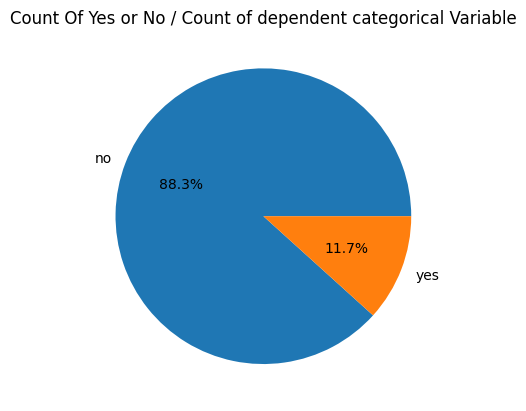

In [112]:
%matplotlib inline
plt.pie(x,labels=['no','yes'],autopct='%1.1f%%')
plt.title('Count Of Yes or No / Count of dependent categorical Variable')
plt.show()

#### From the above pie chart we can say that the data is imbalaced so keeping that in mind we will be handling the unknow data

In [113]:
df['y'].value_counts() #looking at the target variable for data imbalance to take a decision to whether to remove the unknown data rows or to replace or to leave as it is

no     39916
yes     5289
Name: y, dtype: int64

In [114]:
#checking the distribution of unknown data among the target variable
unknown = df[df['education_qual'] == 'unknown']
unknown['y'].value_counts()     
#4.7 % of the minority data will have impact if i replace the target variable'yes'.it is already a minority data point so i am not replacing it 

no     1605
yes     252
Name: y, dtype: int64

In [115]:
unknown = df[df['call_type'] == 'unknown']
unknown['y'].value_counts()
#if i replace . it will make a large noise so i left it as it is.

no     12487
yes      530
Name: y, dtype: int64

In [116]:
unknown = df[df['prev_outcome'] == 'unknown']
unknown['y'].value_counts()

no     33567
yes     3386
Name: y, dtype: int64

In [117]:
df['y'].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

In [118]:
#Dealing with incorrect data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45205 non-null  int64 
 1   job             45205 non-null  object
 2   marital         45205 non-null  object
 3   education_qual  45205 non-null  object
 4   call_type       45205 non-null  object
 5   day             45205 non-null  int64 
 6   mon             45205 non-null  object
 7   dur             45205 non-null  int64 
 8   num_calls       45205 non-null  int64 
 9   prev_outcome    45205 non-null  object
 10  y               45205 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.1+ MB


## EDA

In [119]:
positive = df[df['y'] == 'yes']
negative = df[df['y'] == 'no']

### Analysing who the most bought the product

In [120]:
x = positive['age'].value_counts().to_dict()
count = 0

for k in x.items():
    count += 1
    if count < 16:
        print(k)

(32, 221)
(30, 217)
(33, 210)
(35, 209)
(31, 206)
(34, 198)
(36, 195)
(29, 171)
(37, 170)
(28, 162)
(38, 144)
(39, 143)
(27, 141)
(26, 134)
(41, 120)


**most people between the age group 26-35 bought the product**

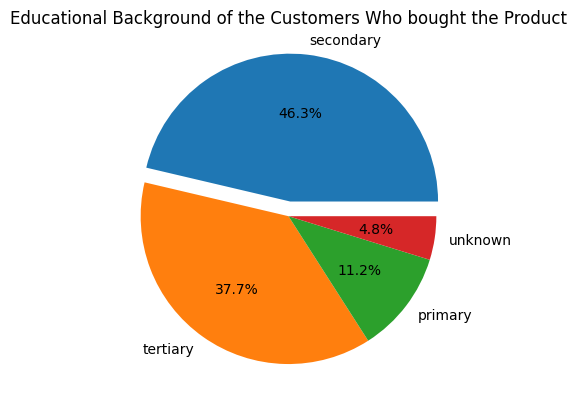

In [121]:
data = positive['education_qual'].value_counts().to_dict()
x = data.values()
label = data.keys()
plt.pie(x,labels=label,autopct='%1.1f%%',explode=[0.1,0,0,0])
plt.title('Educational Background of the Customers Who bought the Product')
plt.show()

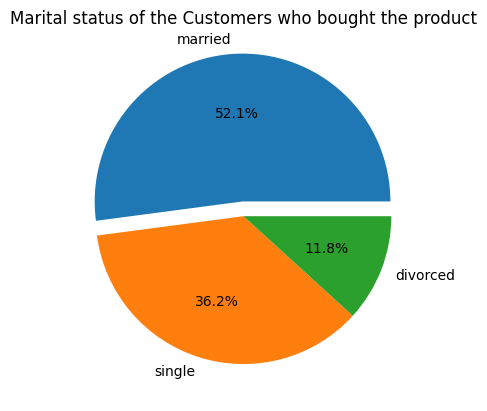

In [122]:
x = positive['marital'].value_counts().to_list()
label = positive['marital'].unique()
plt.pie(x,labels=label,autopct='%1.1f%%',explode=[0.1,0,0])
plt.title('Marital status of the Customers who bought the product')
plt.show()

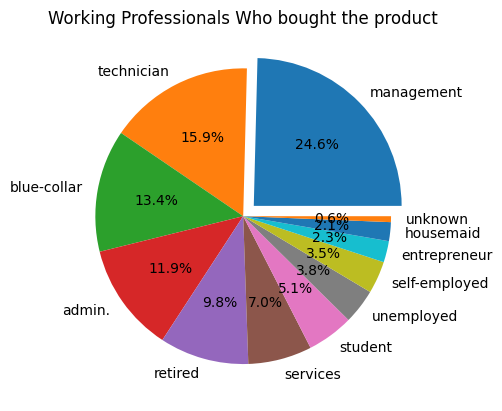

In [123]:
data = positive['job'].value_counts().to_dict()
x = data.values()
label = data.keys()
plt.pie(x,labels=label,autopct='%1.1f%%',explode=[0.1,0,0,0,0,0,0,0,0,0,0,0])
plt.title('Working Professionals Who bought the product')
plt.show()

### Encoding

In [124]:
df['y'] = df['y'].map({'yes':1,'no':0}) #label encoding for the binary target variable

In [125]:
df_encoded = pd.get_dummies(df, columns=['job','marital','education_qual','call_type','mon']) # one-hot-encoding for all other categorical variable

In [126]:
df_encoded = df_encoded.drop(['prev_outcome'],axis = 1) #droping these unwanted columns
df_encoded

,age,day,dur,num_calls,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,mon_dec,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep
0,58,5,261,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,44,5,151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,5,76,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,5,92,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33,5,198,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,17,977,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,17,456,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,17,1127,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45209,57,17,508,4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [127]:
#rearranging the columns . 
target = df_encoded.pop('y')                            
df_encoded.insert(len(df_encoded.columns),'target',target)#making the target variable the last column
df_encoded

,age,day,dur,num_calls,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,target
0,58,5,261,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,44,5,151,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,33,5,76,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,47,5,92,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,33,5,198,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,17,977,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45207,71,17,456,2,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
45208,72,17,1127,5,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
45209,57,17,508,4,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Checking for data imbalance

In [128]:
df_encoded['target'].value_counts() #the data is imbalanced

0    39916
1     5289
Name: target, dtype: int64

* **Synthetic Minority Over-sampling Technique(SMOTE)**
   * It is a popular technique used in data science and machine learning to handle imbalanced datasets. The basic idea behind SMOTE is to generate synthetic samples of the minority class so that the classifier can learn to distinguish between the two classes more accurately.
   * SMOTE works by selecting a random sample from the minority class and creating new synthetic samples by interpolating between the selected sample and its nearest neighbors. This is repeated until the minority class is over-sampled to a desired level

In [129]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
sm = SMOTE(random_state=42,sampling_strategy=0.8)
x=df_encoded.drop('target',axis =1)
y=df_encoded['target']

In [130]:
x_sam,y_sam = sm.fit_resample(x,y)
print(x_sam.shape,y_sam.shape)
print(x.shape)

(71848, 38) (71848,)
(45205, 38)


In [131]:
y_sam.value_counts()

0    39916
1    31932
Name: target, dtype: int64

In [132]:
feature_name = x_sam.columns.to_list() #this variable will be used to extract names of the important features

## Split

In [133]:
#SPLITING THE INDEPENDENT VARIABLE(X) AND DEPENDENT VARIABLE(Y)
X = x_sam.values
y = y_sam.values

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Scaling the data

 **Scaling the data is a good habit because**
  * Improves Model Convergence
  * Prevents Numeric Instability
  * Improves Regularization

In [135]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Voting classifier

In [136]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  #it is must to scale data for svm models
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.metrics import roc_auc_score
model_1 = LogisticRegression(random_state = 0)
model_2 = SVC(kernel = 'linear', random_state = 0,probability=True)
model_3 = BaggingClassifier(tree.DecisionTreeClassifier(max_depth =13 , random_state=1), n_estimators=100)
#model_4 = RandomForestClassifier(n_estimators = 13, criterion = 'entropy', random_state = 0)

model = VotingClassifier(estimators=[('LR', model_1), ('SVC', model_2),('BC',model_3)],voting='soft')
model.fit(X_train,y_train)
preds = model.predict(X_test)
auroc = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

In [137]:
auroc

0.9860375653192288

**Bagging Classifier** is an ensemble machine learning technique that is used to improve the accuracy of a classification algorithm. It is based on the concept of bootstrap aggregating (bagging) and uses an ensemble of multiple models trained on different random samples of the training dataset.

In bagging classifier, a set of decision trees are created on randomly selected subsets of the training dataset, where each tree is trained on a different subset of the data. The outputs of all the decision trees are then aggregated to make the final prediction. This technique helps to reduce overfitting and increase the accuracy of the model.

In [138]:
#Extracting Feature importance from the bagging classifier model
model = BaggingClassifier(tree.DecisionTreeClassifier(max_depth =13 , random_state=1), n_estimators=100)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:,1]

## Feature importance

In [139]:
feature_importances = {}

# loop over each base estimator in the ensemble
for i, clf in enumerate(model.estimators_):
    # get feature importances for the base estimator
    importances = clf.feature_importances_
    # get feature names for the base estimator (assuming you have stored them in a list or array)
    feature_names = feature_name
    # store feature importances for the base estimator in the dictionary
    for feat, importance in zip(feature_names, importances):
        if feat in feature_importances:
            feature_importances[feat] += importance
        else:
            feature_importances[feat] = importance

# aggregate feature importances across all base estimators
total_importances = sum(feature_importances.values())

# calculate feature importance scores as percentages
feature_importance_scores = {feat: (importance / total_importances) * 100 for feat, importance in feature_importances.items()}

# sort feature importance scores in descending order
sorted_feature_importance_scores = {k: v for k, v in sorted(feature_importance_scores.items(), key=lambda item: item[1], reverse=True)}

# print feature importance scores with their original feature names
for feat, score in sorted_feature_importance_scores.items():
    print(feat, score)

dur 35.86455178388766
call_type_unknown 12.133426921333305
mon_jul 5.651219534908334
day 5.598015530678484
mon_may 5.053505513151612
mon_nov 4.625244130141725
mon_aug 4.361450949109194
mon_apr 3.545137331370505
mon_feb 3.453648811760248
age 3.320102563405797
mon_jan 3.2926394999415507
num_calls 2.957228975956469
job_blue-collar 1.2114918187951433
marital_married 0.8939446466003235
marital_divorced 0.8916447838467062
education_qual_secondary 0.7497725952041044
mon_jun 0.679759781341073
marital_single 0.6226952338126867
education_qual_tertiary 0.6101230198706611
mon_oct 0.5210378030086759
education_qual_primary 0.516781601172347
education_qual_unknown 0.4613670423874305
job_management 0.4388275488430407
call_type_telephone 0.3923890015162241
job_technician 0.36350164189752127
call_type_cellular 0.35259094863235424
mon_sep 0.2919695614004997
job_admin. 0.18959923122567887
job_services 0.14230781463959882
mon_mar 0.13385713686434741
job_student 0.12111358600701803
job_unemployed 0.11583548

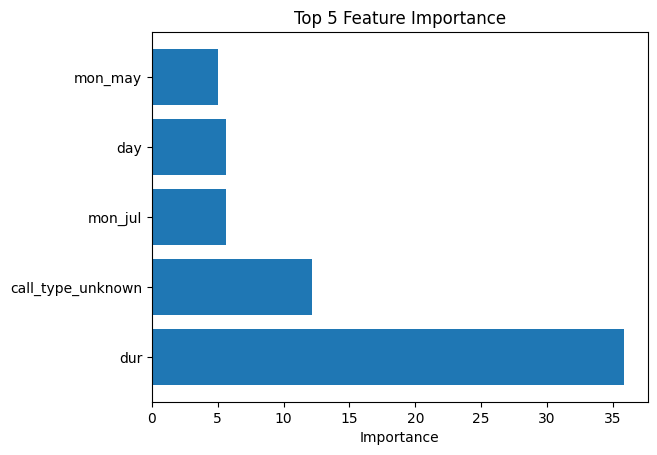

In [149]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data
features = list(sorted_feature_importance_scores.keys())
importance = list(sorted_feature_importance_scores.values())

# Create a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(features[:5], importance[:5])

# Add labels and title
ax.set_xlabel('Importance')
ax.set_title('Top 5 Feature Importance')

# Display the plot
plt.show()
